<a href="https://colab.research.google.com/github/junehyung1112/hello-world/blob/master/12%EA%B0%95_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#신경망 구조가 깊어질 경우, 학습이 잘 이루어지지 않음. 최적화 방법을 알아보자.
#일부 신경망이 아닌 전체 신경망에서 학습이 이루어져야 인식 정확도가 높아짐.
#과거 학습 정보를 고려하기 때문에, 빠른 학습이 가능해짐.

#1. 기울기 소실 문제(vanishing gradient).
#역전파 알고리즘은 출력에서 입력으로 거꾸로 전파해가며 가중치를 수정해서 오류를 줄여나가는 알고리즘
#하지만 역전파 알고리즘의 문제로 인해 다시 신경망의 침체기를 겪음.
#역전파 오류 알고리즘은 출력층에서 입력층으로 거꾸로 가중치를 수정해나가는 방식이여서
#출력층의 가까운부분부터 업데이트해서 가까운 부분은 학습이 잘 일어나지만
#계층이 깊어질수록 입력층과 가까이 있는 가중치들은 학습이 제대로 되지 않음.
#학습이 잘이루어진다는 것은 가중치의 변화 발생을 의미한다.
#학습이 안되고있다는 것은 가중치의 변화가 발생하지 않는다는 것을 의미한다.(cost함수의 미분값이 0)
#역전파 알고리즘에서는 출력층에서 멀어질수록 신경망의 출력오차가 반영되지 않음
#이를 기울기 소실(Vanishing gradient) : 앞층으로 갈수록 오차가 잘 전달되지 않는 현상.
#기울기 소실을 발생시키는 원인 중 하나는 sigmoid 함수이다.
#다층 구조를 학습시킬 때, sigmoid함수는 모든 입력 값을 0~1로 출력하게 되는데
#sigmoid 함수의 그래프를 보면 미분한 값이 0이 되는 곳이 있음.
#경사하강법은 미분한 값만큼 변화가 일어나서 이 변화만큼 학습이 되는데, 미분값이 0이므로 학습이 이루어지지 않음.
#즉 0,1을 강제 출력하는 영역에서는 학습이 잘 일어나지 않음.
#또한 도함수의 계산 결과가 역방향으로 전달될 때, 출력값이 현저하게 감소된다.
#이유: sigmoid함수를 미분한 도함수는 sigmoid함수를 제곱한 형태이기 때문에 원래 0~1사이인 sigmoid함수가 제곱됨으로써 훨씬 더 작아진다.
#즉 입력층으로 갈수록 미분값이 0에 가까워져 학습효과가 발생하지 않는다.

#2. 기울기 소실 문제를 해결하기 위해 sigmoid 함수 대신 ReLU함수가 제안됨.
#sigmoid 함수에 비해서 매우 간단한 함수이다. 
#f(x) = 0 for x<0, f(x) = x for x >= 0
#f'(x) = 0 for x<0, f'(x) = 1 for x>=0
#계산 복잡도가 낮아져 깊은 신경망에서 학습속도 개선 효과.
#relu함수는 비선형 함수이며, 양수 영역에 대해서는 전구간에서 미분값이 존재하여 학습이 이루어짐.
#relu 함수를 이용하면 미분값이 1이여서 층이 깊어져도 학습효과가 지속될 수 있음.
#신경망을 포함한 딥러닝 분야에서 relu함수를 가장 많이 사용.
#Leaky ReLu : Relu함수와 유사한 형태
#f(x) = ax for x<0, f(x) = x for x>=0
#f'(x) = a for x<0 and f'(x) = 1 for x>=0
#x<0인 영역은 아주 작은 기울기를 가져서 약간의 학습이 일어남.
#음수 값에 대해서 작은 미분값을 가지고 있기 때문에, 약간 학습을 할 수 있음.
#다층구조에 적합한 비활성화 함수를 사용해서 모든 계층의 가중치가 학습될 수 있음.

#3 지금까지 랜덤하게 가중치를 초기화했는데, 이럴 경우 어떤 문제가 생길까?
#사전 정보가 없다면 랜덤하게 지정해서 경사하강법을 이용해 최적의 w와 b를 찾을 수 있음.
#하지만 선형 함수를 사용하는 경우에는 어떤 w에서 시작해도 수렴하지만,
#다층 구조, 각각의 층에서 다양한 비선형 함수를 사용할 경우 w에 대한 cost함수가 U자 형태의 미분하기 쉬운 구조가 아니라
#복잡한 형태의 구조를 갖게 된다.
#이 경우, 잘못된 초기값을 선택하면 전역 최소값이 아니라 지역 최소점에 도달할 수 있다.
#원활한 학습을 위해 주어진 문제에 맞는 데이터 분포를 고려해 적절한 초기화를 수행해야 함.
#지금까지 사용한 정규분포 초기화의 경우, 0.5를 중심으로 가장 많은 데이터가 생성되고 0, 1로 갈수록 적은 데이터 생성.
#특징의 수가 크게 늘어날 경우 매우 큰 값으로 발산할 수 있음.
#이를 해결하기 위한 방법
#1.Xavier 초기화.
#sigmoid 함수를 활성화 함수로 사용할 경우 학습이 일어날 가능성이 매우 높아지는 초기화.
#입력 노드와 출력 노드를 사용해서 초기화 함.
#정규 분포 표준 편차 = (3.0 / (input+output)) ** 1/2
#데이터의 특성을 반영해서 표준편차를 결정.
#정규 분포가 아닌 uniform 분포를 통해 초기화 할 수도 있음
#-range ~ +range 사이로 랜덤하게 초기화함.
#range = (6.0 / (input + output)) ** 1/2 -> 0을 중심으로 정규분포를 가짐.
#2. He 초기화.
#Relu 활성화 함수를 사용할 때의 초기화 방법.
#입력값을 반으로 나눈 제곱근을 사용.
#0보다 작은 부분에 대해서는 학습이 이루어지지 않음.
#둘 다 평균이 0인 정규분포를 기준으로 가중치들을 작은 값으로 초기화할 수 있음
#그리고 데이터의 특성값을 사용해 초기값을 계산함.

#4.딥러닝에서 학습 수렴 소도를 개선.
#모멘텀을 이용해서 수렴 속도를 개선 : 관성의 법칙을 이용해 최적화
#속도가 클수록 기울기가 크게 업데이트되는 방식 -> 경사하강법의 단점을 보완.
#지역 최소점에 빠지지 않고 학습이 계속 일어나도록 할 수 있음. 
#vt라고 하는 모멘텀 텀이 더해져 가중치 변화가 이루어져 학습 변화량이 커짐.
#vt는 현재까지 발생한 가중치 변화량을 모두 누적한 값.
#오래 전 변화량에 작은 값을, 최근 변화량에는 큰 값을 주기 위해 모멘텀 상수(r)를 지수 속에 곱함.
#모멘텀은 같은 방향으로 많이 움직일 수록 vt가 커져서 학습 수렴 속도가 빨라짐.
#계산량이 많은 큰 신경망에서 학습에 대한 수렴 속도를 빠르게 할 수 있음.
#ADAM : 학습률을 조절해가면서 이전 속도를 계산하여 가중치를 업데이트 함. (가장 많이 사용)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #CSV 파일 이용 위해.
import time #실행시간 측정

%matplotlib inline

sess = tf.Session()

In [0]:
from google.colab import drive #구글 드라이브에서 정보를 가져오기 위해서 코랩과 구글 드라이브를 연동.
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


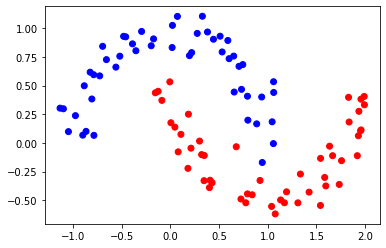

In [0]:
#은닉층이 많아지면 학습이 제대로 되지 않는 것을 알아보자.
x_data = np.load('/content/drive/My Drive/files/moons_x.npy')
y_data = np.load('/content/drive/My Drive/files/moons_y.npy')
y_data = y_data.reshape(100,1)

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)

In [0]:
learning_rate = 0.1

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])


def addLayer(x, node) :    
    input = x.shape.as_list()    
    w = tf.Variable(tf.random_normal([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.sigmoid(tf.matmul(x, w) + b)    
    return layer


layer_1 = addLayer(x, 5)
layer_2 = addLayer(layer_1, 5)
layer_3 = addLayer(layer_2, 5)
layer_4 = addLayer(layer_3, 5)
hypothesis = addLayer(layer_2, 1)

In [0]:
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  

update = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

1 0.5 0.67840844
1001 0.84 0.34978542
2001 0.89 0.29726365
3001 0.9 0.2852507
4001 0.9 0.27244624
5001 0.91 0.25289968
6001 0.95 0.15793884
7001 0.98 0.081482135
8001 0.99 0.05045938
9001 0.99 0.035638846
10001 0.99 0.027228756
10900 1.0 0.022336818


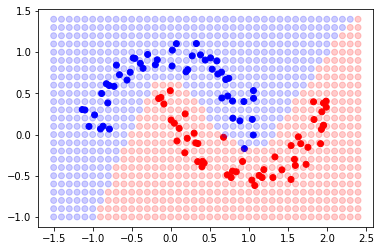

In [0]:
sess.run(tf.global_variables_initializer())

for step in range(20001):
        sess.run(update, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if a == 1.0 : 
            print(step + 1, a, c) 
            break
        if step % 1000 == 0 :
            print(step + 1, a, c) 

#학습 데이터 시각화
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  

xx, yy = np.mgrid[-1.5:2.5:0.1, -1:1.5:0.1]
grid = np.c_[xx.flatten(), yy.flatten()]
p = sess.run(hypothesis, feed_dict={x: grid})

colors = ["red"  if i>  0.5  else  "blue"  for i  in p   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)   
#학습 횟수가 많을수록 정확도가 올라감을 알 수 있음.
#실행할 때마다 결정 경계면은 유사하게 나옴.

In [0]:
#은닉층의 노드의 수를 8개로, 학습률은 0.1에서 0.01로 변환
#학습률이 너무 크면 정교한 탐색이 어렵기 때문.
node = 5
layer_1 = addLayer(x, node)    
layer_2 = addLayer(layer_1, node)    
layer_3 = addLayer(layer_2, node)    
layer_4 = addLayer(layer_3, node)    
layer_5 = addLayer(layer_4, node)    
layer_6 = addLayer(layer_5, node)    
layer_7 = addLayer(layer_6, node)    
layer_8 = addLayer(layer_7, node)    

hypothesis = addLayer(layer_8, 1)

1 0.5 0.7419256
1001 0.57 0.69311416
2001 0.64 0.6931135
3001 0.64 0.69311273
4001 0.64 0.69311196
5001 0.64 0.6931111
6001 0.64 0.6931104
7001 0.64 0.6931097
8001 0.64 0.693109
9001 0.64 0.69310814
10001 0.64 0.6931074
11001 0.64 0.69310653
12001 0.64 0.69310576
13001 0.64 0.6931049
14001 0.64 0.69310415
15001 0.64 0.69310343
16001 0.65 0.6931026
17001 0.65 0.6931018
18001 0.65 0.69310087
19001 0.65 0.69310004
20001 0.65 0.69309926


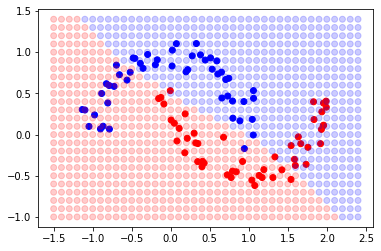

In [0]:
learning_rate = 0.01
 
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))


sess.run(tf.global_variables_initializer())

for step in range(20001):
        sess.run([train, cost], feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if a == 1.0 :
            print(step + 1, a, c) 
            break
        if step % 1000 == 0 :
            print(step + 1, a, c) 
            
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  

xx, yy = np.mgrid[-1.5:2.5:0.1, -1:1.5:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)
#어느정도 선에서 더이상 향상되지 않음.
#학습이 제대로 수행되지 않았음을 확인 가능.

In [0]:
#sigmoid 함수를 relu함수로 변환.
def addLayerReLU(x, node) :    #적절한 초기화가 이루어지지 않으면 Relu함수가 동작하지 않음->먼저 leaky Relu사용
    input = x.get_shape().as_list()    
    w = tf.Variable(tf.random_normal([input[1], node]))    
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.nn.leaky_relu(tf.matmul(x, w) + b)    
    #layer = tf.nn.relu(tf.matmul(x, w) + b)    
    return layer

node = 5
layer_1 = addLayerReLU(x, node)    
layer_2 = addLayerReLU(layer_1, node)    
layer_3 = addLayerReLU(layer_2, node)    
layer_4 = addLayerReLU(layer_3, node)    
layer_5 = addLayerReLU(layer_4, node)    
layer_6 = addLayerReLU(layer_5, node)    
layer_7 = addLayerReLU(layer_6, node)    
layer_8 = addLayerReLU(layer_7, node)    
hypothesis = addLayer(layer_8, 1) #마지막 출력층은 sigmoid 함수를 사용해 출력값을 0~1로 제한.
    

In [0]:
#Relu함수는 sigmoid 함수처럼 0~1까지 제한이 되지 않으므로 log를 바꿔줘야함.
#log0이 계산되는 것을 막기 위해 10**-10을 더해줌.
cost = -tf.reduce_mean(y * tf.log(hypothesis+1e-10) + (1 - y) * tf.log(1 - hypothesis+1e-10))  

train = tf.train.GradientDescentOptimizer(learning_rate  = learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

1 0.5 0.8526977
435 1.0


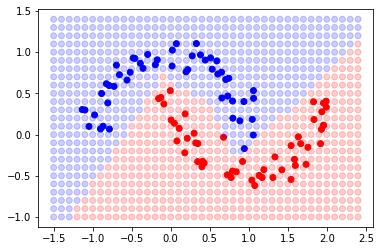

In [0]:
sess.run(tf.global_variables_initializer())

for step in range(10001):
        sess.run([train, cost], feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})        
        if a == 1.0  : break            #정확도가 100퍼센트면 학습 종료.
        if step % 1000 == 0 :
            print(step + 1, a, c) 
        old = c
p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})        
print(step, a)
            
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  

xx, yy = np.mgrid[-1.5:2.5:0.1, -1:1.5:0.1]
grid = np.c_[xx.ravel(), yy.ravel()]
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2) 
#매우 빠르게 학습이 됨.
#sigmoid 함수를 사용할 경우, 학습이 되어도 20000번이상 해야하지만 Relu를 사용하면 금방 끝남.  

In [0]:
#은닉층의 가중치와 출력층의 가중치 모두 정규 분포로부터 초기화.
#은닉층은 Relu, 출력층은 sigmoid 사용. 10개의 은닉층으로 구성.
def addLayerReLU(x, node) :    
    input = x.shape.as_list()    
    w = tf.Variable(tf.random_normal([input[1], node])) 
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.nn.relu(tf.matmul(x, w) + b)    
    return layer


def addLayer(x, node) :    
    input = x.shape.as_list()    
    w = tf.Variable(tf.random_normal([input[1], node])) 
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.sigmoid(tf.matmul(x, w) + b)    
    return layer



layer_1 = addLayerReLU(x, 5)    
layer_2 = addLayerReLU(layer_1, 5)    
layer_3 = addLayerReLU(layer_2, 5)    
layer_4 = addLayerReLU(layer_3, 5)    
layer_5 = addLayerReLU(layer_4, 5)    
layer_6 = addLayerReLU(layer_5, 5)    
layer_7 = addLayerReLU(layer_6, 5)    
layer_8 = addLayerReLU(layer_7, 5)    
layer_9 = addLayerReLU(layer_8, 5)    
layer_10 = addLayerReLU(layer_9, 5)    
hypothesis = addLayer(layer_10, 1)
    
 
cost = -tf.reduce_mean(y * tf.log(hypothesis+ 1e-10) + (1 - y) * tf.log(1 - hypothesis+ 1e-10))  

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [0]:
learning_rate = 0.1 
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

count = 0
for i in range(10) :  
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
            sess.run(train, feed_dict={x: x_data, y: y_data})
            p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
            if a >= 0.9 : 
                count += 1
                
                break
    print(step, a)
    
print('수렴횟수 ', count)
#거의 학습이 이루지지 않고 있음을 알 수 있음.

5000 0.5
5000 0.5


KeyboardInterrupt: ignored

In [0]:
#xaviar와 He 알고리리즘으로 초기화
#은닉층은 he 출력층은 xavier 사용.
def addLayer(x, node) :    
    input = x.shape.as_list()    
    initializer = tf.contrib.layers.xavier_initializer()
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.sigmoid(tf.matmul(x, w) + b)    
    return layer


def addLayerReLU(x, node) :    
    input = x.shape.as_list()    
    initializer=tf.contrib.layers.variance_scaling_initializer()    
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.nn.relu(tf.matmul(x, w) + b)    
    #layer = tf.nn.leaky_relu(tf.matmul(x, w) + b)    
    return layer

layer_1 = addLayerReLU(x, 5)    
layer_2 = addLayerReLU(layer_1, 5)    
layer_3 = addLayerReLU(layer_2, 5)    
layer_4 = addLayerReLU(layer_3, 5)    
layer_5 = addLayerReLU(layer_4, 5)    
layer_6 = addLayerReLU(layer_5, 5)    
layer_7 = addLayerReLU(layer_6, 5)    
layer_8 = addLayerReLU(layer_7, 5)    
layer_9 = addLayerReLU(layer_8, 5)    
layer_10 = addLayerReLU(layer_9, 5)    
hypothesis = addLayer(layer_10, 1)
    
 
cost = -tf.reduce_mean(y * tf.log(hypothesis+ 1e-10) + (1 - y) * tf.log(1 - hypothesis+ 1e-10))  

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))


In [0]:

learning_rate = 0.1 
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

count = 0
for i in range(10) :  
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
            sess.run(train, feed_dict={x: x_data, y: y_data})
            p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
            if a >= 0.9 : 
                count += 1
                
                break
    print(step, a)
    
print('수렴횟수 ', count)
#수렴횟수가 매우 높음: 초기화 방법이 매우 효과적임을 알 수 있음.

5000 0.5
349 0.91
898 0.91
5000 0.73
5000 0.5
388 0.91
42 0.91
122 0.91
5000 0.5
341 0.91
수렴횟수  6


In [0]:
#은닉층의 가중치는 Leaky_Relu함수, 출력층은 Xavier 알고리즘으로 초기화
def addLayer(x, node) :    
    input = x.shape.as_list()    
    initializer = tf.contrib.layers.xavier_initializer()
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.sigmoid(tf.matmul(x, w) + b)    
    return layer


def addLayerReLU(x, node) :    
    input = x.shape.as_list()    
    initializer=tf.contrib.layers.variance_scaling_initializer()    
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))    
    layer = tf.nn.leaky_relu(tf.matmul(x, w) + b)    
    return layer

layer_1 = addLayerReLU(x, 5)    
layer_2 = addLayerReLU(layer_1, 5)    
layer_3 = addLayerReLU(layer_2, 5)    
layer_4 = addLayerReLU(layer_3, 5)    
layer_5 = addLayerReLU(layer_4, 5)    
layer_6 = addLayerReLU(layer_5, 5)    
layer_7 = addLayerReLU(layer_6, 5)    
layer_8 = addLayerReLU(layer_7, 5)    
layer_9 = addLayerReLU(layer_8, 5)    
layer_10 = addLayerReLU(layer_9, 5)    
hypothesis = addLayer(layer_10, 1)
    
 
cost = -tf.reduce_mean(y * tf.log(hypothesis+ 1e-10) + (1 - y) * tf.log(1 - hypothesis+ 1e-10))  

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [0]:
learning_rate = 0.1
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

count = 0
for i in range(10) :  
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
            sess.run(train, feed_dict={x: x_data, y: y_data})
            p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
            if a >= 0.9 : 
                count += 1                
                break
    print(step, a)
    
print('수렴횟수 ', count)
#빠르고 수렴횟수가 많음 -> 매우 효과적,
#데이터 셋의 특성에 따라 달라질 수도 있음
#음수영역에서의 Relu 함수의 단점을 leaky_relu가 개선

292 0.91
95 0.91
536 0.91
88 0.94
286 0.91
17 0.93
74 0.91
323 0.91
1366 0.91
155 0.91
수렴횟수  10


In [0]:
#경사하강법을 개선해 momentum 사용
#텐서플로우는 다른 부분 변경없이 최적화 함수만 변경하면 학습이 가능해짐
#다만 각각의 최적화 알고리즘은 학습률과 매우 연관이 깊기 때문에
#먼저 기본 경사하강법에 학습률을 각각 바꾸어서 세가지 방법에서의 특성 알아봄.

#활성화 함수 = leaky_relu, 가중치 초기화는 출렧층 xavier 은닉층 he 사용

def addLayer(x, node) :    
    input = x.get_shape().as_list()    
    initializer = tf.contrib.layers.xavier_initializer()
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.sigmoid(tf.matmul(x, w) + b)    
    return layer


def addLayerReLU(x, node) :    
    input = x.get_shape().as_list()    
    initializer=tf.contrib.layers.variance_scaling_initializer()    
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.nn.leaky_relu(tf.matmul(x, w) + b)    
    return layer

layer_1 = addLayerReLU(x, 5)    
layer_2 = addLayerReLU(layer_1, 5)    
layer_3 = addLayerReLU(layer_2, 5)    
layer_4 = addLayerReLU(layer_3, 5)    
layer_5 = addLayerReLU(layer_4, 5)    
layer_6 = addLayerReLU(layer_5, 5)    
layer_7 = addLayerReLU(layer_6, 5)    
layer_8 = addLayerReLU(layer_7, 5)    
layer_9 = addLayerReLU(layer_8, 5)    
layer_10 = addLayerReLU(layer_9, 5)    
hypothesis = addLayer(layer_10, 1)
    
 
cost = -tf.reduce_mean(y * tf.log(hypothesis+ 1e-10) + (1 - y) * tf.log(1 - hypothesis+ 1e-10))  

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [0]:
#학습률 0.1
learning_rate = 0.1
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
#train = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(cost)      
#train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


accs = []
steps = []
for i in range(10) :  
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
            sess.run(train, feed_dict={x: x_data, y: y_data})
            p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
            if a == 1.0 : break
    print(step, a)
    accs.append(a)
    steps.append(step)    
    
accs = np.array(accs)
steps = np.array(steps)

print('평균 인식률', np.mean(accs))
print('평균 학습 횟수', np.mean(steps))


163 1.0
355 1.0
205 1.0
423 1.0
321 1.0
212 1.0
289 1.0
719 1.0
1461 1.0
125 1.0
평균 인식률 1.0
평균 학습 횟수 427.3


In [0]:

learning_rate = 0.01
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
#train = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(cost)      
#train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


accs = []
steps = []
for i in range(10) :  
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
            sess.run(train, feed_dict={x: x_data, y: y_data})
            p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
            if a == 1.0 : break
    print(step, a)
    accs.append(a)
    steps.append(step)    
    
accs = np.array(accs)
steps = np.array(steps)

print('평균 인식률', np.mean(accs))
print('평균 학습 횟수', np.mean(steps))


3314 1.0
1019 1.0
1216 1.0
1240 1.0
1740 1.0
739 1.0
958 1.0
3795 1.0


KeyboardInterrupt: ignored

In [0]:

learning_rate = 0.001
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
#train = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(cost)      
#train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


accs = []
steps = []
for i in range(10) :  
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
            sess.run(train, feed_dict={x: x_data, y: y_data})
            p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
            if a == 1.0 : break
    print(step, a)
    accs.append(a)
    steps.append(step)    
    
accs = np.array(accs)
steps = np.array(steps)

print('평균 인식률', np.mean(accs))
print('평균 학습 횟수', np.mean(steps))
#학습률이 작아서 5000번의 학습 횟수로는 학습이 불가능함 -> 평균 인식률이 낮아지고 학습 횟수도 크게 증가.

In [0]:
#모멘텀 최적화 방법을 이용
#학습률과 모멘텀 상수가 필요. 모멘텀 상수가 클수록 이전 기울기를 더 많이 반영

learning_rate = 0.1
#train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
train = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(cost)      #모멘텀 상수 = 0.9
#train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


accs = []
steps = []
for i in range(10) :  
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
            sess.run(train, feed_dict={x: x_data, y: y_data})
            p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
            if a == 1.0 : break
    print(step, a)
    accs.append(a)
    steps.append(step)    
    
accs = np.array(accs)
steps = np.array(steps)

print('평균 인식률', np.mean(accs))
print('평균 학습 횟수', np.mean(steps))
#학습이 가능할 때는 매우 빠르게 수렴하지만, 많은 경우 제대로 수렴하지 않음.
#학습률이 높은데 모멘텀 까지 더해져 제대로 계산 되지 않음

5000 0.5
5000 0.5
82 1.0
229 1.0
5000 0.5
5000 0.5
186 1.0
95 1.0
1429 1.0
289 1.0
평균 인식률 0.8
평균 학습 횟수 2231.0


In [0]:

learning_rate = 0.01
#train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
train = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(cost)      
#train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


accs = []
steps = []
for i in range(10) :  
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
            sess.run(train, feed_dict={x: x_data, y: y_data})
            p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
            if a == 1.0 : break
    print(step, a)
    accs.append(a)
    steps.append(step)    
    
accs = np.array(accs)
steps = np.array(steps)

print('평균 인식률', np.mean(accs))
print('평균 학습 횟수', np.mean(steps))
#학습이 제대로 일어나고 있음을 알 수 있음.

In [0]:

learning_rate = 0.001
#train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
train = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(cost)      
#train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


accs = []
steps = []
for i in range(10) :  
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
            sess.run(train, feed_dict={x: x_data, y: y_data})
            p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
            if a == 1.0 : break
    print(step, a)
    accs.append(a)
    steps.append(step)    
    
accs = np.array(accs)
steps = np.array(steps)

print('평균 인식률', np.mean(accs))
print('평균 학습 횟수', np.mean(steps))
#매우 천천히 학습이 진행되기 때문에 학습 횟수는 크게 증가함. -> 너무 작은 학습률은 적합하지 않음.

In [0]:
#amam 최적화 아ㅣ용. 

learning_rate = 0.1
#train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
#train = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(cost)      
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


accs = []
steps = []
for i in range(10) :  
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
            sess.run(train, feed_dict={x: x_data, y: y_data})
            p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
            if a == 1.0 : break
    print(step, a)
    accs.append(a)
    steps.append(step)    
    
accs = np.array(accs)
steps = np.array(steps)

print('평균 인식률', np.mean(accs))
print('평균 학습 횟수', np.mean(steps))
#학습이 가능할 때는 매우 빠르게 수렴하지만 모멘텀과 같은 이유로 대부분 제대로 안됨.

In [0]:

learning_rate = 0.01
#train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
#train = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(cost)      
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


accs = []
steps = []
for i in range(10) :  
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
            sess.run(train, feed_dict={x: x_data, y: y_data})
            p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
            if a == 1.0 : break
    print(step, a)
    accs.append(a)
    steps.append(step)    
    
accs = np.array(accs)
steps = np.array(steps)

print('평균 인식률', np.mean(accs))
print('평균 학습 횟수', np.mean(steps))

In [0]:

learning_rate = 0.001
#train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
#train = tf.train.MomentumOptimizer(learning_rate, 0.9).minimize(cost)      
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


accs = []
steps = []
for i in range(10) :  
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
            sess.run(train, feed_dict={x: x_data, y: y_data})
            p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
            if a == 1.0 : break
    print(step, a)
    accs.append(a)
    steps.append(step)    
    
accs = np.array(accs)
steps = np.array(steps)

print('평균 인식률', np.mean(accs))
print('평균 학습 횟수', np.mean(steps))
#인식률도 높고 학습 횟수도 모멘텀에 비해 매우 적음.
#아담 최적화 방법은 학습률을 내부적으로 조절하기 때문에, 작은 학습률임에도 어느 정도 성능이 유지됨.
#결론적으로 기본 경사하강법은 학습률이 작으면 수렴이 안되므로 0.1 혹은 0.01의 큰 값을 사용해야 함.
#모멘텀이나 아담은 학습률이 매우 작아도 빠르게 수렴이 가능함.
#학습률이 작기 때문에 최적의 결론을 찾아낼 수 있음.

1245 1.0
1145 1.0
677 1.0
1019 1.0
510 1.0
332 1.0
504 1.0
371 1.0
544 1.0
431 1.0
평균 인식률 1.0
평균 학습 횟수 677.8


In [0]:
#xor 게이트를 딥러닝을 이용해 최적화 방법 찾아봄.

learning_rate = 0.01

x_data = [[0, 0],       [0, 1],            [1, 0],         [1, 1]]
y_data = [[0],       [1],        [1],        [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

In [0]:

def addLayerReLU(x, node) :    
    input = x.get_shape().as_list()    
    initializer=tf.contrib.layers.variance_scaling_initializer()    
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.nn.leaky_relu(tf.matmul(x, w) + b)
    #layer = tf.nn.relu(tf.matmul(x, w) + b)
    return layer


def addOutputLayer(x, node) :    
    input = x.get_shape().as_list()    
    w = tf.Variable(tf.random_normal([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.sigmoid(tf.matmul(x, w) + b)
    return layer


layer1= addLayerReLU(x, 5 )        
layer2= addLayerReLU(layer1, 5 )        
layer3= addLayerReLU(layer2, 5 )        
layer4= addLayerReLU(layer3, 5 )        
layer5= addLayerReLU(layer4, 5 )        
layer6= addLayerReLU(layer5, 5 )        
layer7= addLayerReLU(layer6, 5 )
hypothesis = addOutputLayer(layer7, 1)
    

In [0]:
#아담 최적화 방법 사용

cost = -tf.reduce_mean(y * tf.log(hypothesis+10e-6) + (1 - y) * tf.log(1 - hypothesis+10e-6))  

train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))


sess.run(tf.global_variables_initializer())

for step in range(10001):
        sess.run([train, cost], feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if a == 1.0 : 
            print("완료", step, p.reshape(1,4), a, c) 
            break
        if step % 500 == 0 :
            print(step, p.reshape(1,4), a, c) 
#매우 빠르게 학습함.

In [0]:
#leaky_Relu말고 Relu 함수로 변경해서 해봄

def addLayerReLU(x, node) :    
    input = x.get_shape().as_list()    
    initializer=tf.contrib.layers.variance_scaling_initializer()    
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    #layer = tf.nn.leaky_relu(tf.matmul(x, w) + b)
    layer = tf.nn.relu(tf.matmul(x, w) + b)
    return layer

layer1= addLayerReLU(x, 5 )        
layer2= addLayerReLU(layer1, 5 )        
layer3= addLayerReLU(layer2, 5 )        
layer4= addLayerReLU(layer3, 5 )        
layer5= addLayerReLU(layer4, 5 )        
layer6= addLayerReLU(layer5, 5 )        
layer7= addLayerReLU(layer6, 5 )
hypothesis = addOutputLayer(layer7, 1)

cost = -tf.reduce_mean(y * tf.log(hypothesis+10e-6) + (1 - y) * tf.log(1 - hypothesis+10e-6))  

train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))


sess.run(tf.global_variables_initializer())

for step in range(10001):
        sess.run([train, cost], feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if a == 1.0 : 
            print("완료", step, p.reshape(1,4), a, c) 
            break
        if step % 500 == 0 :
            print(step, p.reshape(1,4), a, c) 

    

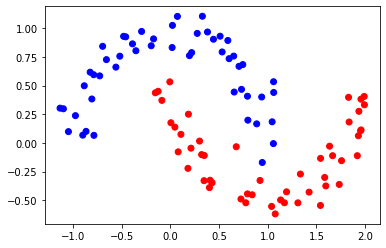

In [0]:
x_data = np.load('/content/drive/My Drive/files/moons_x.npy')
y_data = np.load('/content/drive/My Drive/files/moons_y.npy')
y_data = y_data.reshape(100,1)

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)

In [0]:
#활성화 함수로 leaky_relu, 가중치 초기화로 Xavier

def addLayerReLU(x, node) :    
    input = x.get_shape().as_list()    
    initializer=tf.contrib.layers.variance_scaling_initializer()    
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.nn.leaky_relu(tf.matmul(x, w) + b)    
    return layer


def addOutputLayer(x, node) :    
    input = x.get_shape().as_list()    
    w = tf.Variable(tf.random_normal([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.sigmoid(tf.matmul(x, w) + b)
    return layer


node = 5
layer_1 = addLayerReLU(x, node)    
layer_2 = addLayerReLU(layer_1, node)    
layer_3 = addLayerReLU(layer_2, node)    
layer_4 = addLayerReLU(layer_3, node)    
layer_5 = addLayerReLU(layer_4, node)    
layer_6 = addLayerReLU(layer_5, node)    
layer_7 = addLayerReLU(layer_6, node)    
layer_8 = addLayerReLU(layer_7, node)    
hypothesis = addOutputLayer(layer_8, 1)     
    

0 0.5 0.8114632
완료 180 1.0 0.017014679


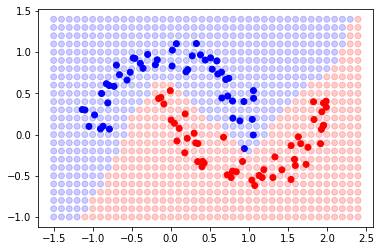

In [0]:
#아담 최적화 사용
cost = -tf.reduce_mean(y * tf.log(hypothesis+10e-6) + (1 - y) * tf.log(1 - hypothesis+10e-6))  


train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())

for step in range(10001):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if a == 1.0 : 
            print("완료", step, a, c) 
            break
        if step % 500 == 0 :
            print(step, a, c) 
            
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  

xx, yy = np.mgrid[-1.5:2.5:0.1, -1:1.5:0.1]
grid = np.c_[xx.flatten(), yy.flatten()]
p = sess.run(hypothesis, feed_dict={x: grid})

colors = ["red"  if i>  0.5  else  "blue"  for i  in p   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)
#매우 빠르게 수렴하고, 은닉층의 수가 많아서 결정경계면이 다양하게 출력.

0 0.5 0.83775556
500 0.86 0.32586488
1000 0.89 0.27941674
1500 0.9 0.26055363
2000 0.91 0.24166167
2500 0.91 0.22892034
3000 0.91 0.21861835
3500 0.93 0.17291899
4000 0.99 0.055775687
완료 4489 1.0 0.025756834


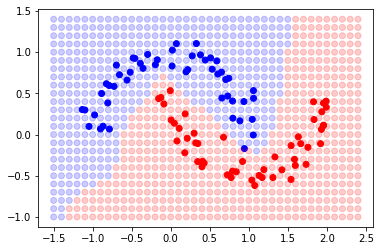

In [0]:
#adam 최적화가 아닌 기본 경사하강법을 사용해봄
cost = -tf.reduce_mean(y * tf.log(hypothesis+10e-6) + (1 - y) * tf.log(1 - hypothesis+10e-6))  


train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())

for step in range(10001):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if a == 1.0 : 
            print("완료", step, a, c) 
            break
        if step % 500 == 0 :
            print(step, a, c) 
            
colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]

plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)  

xx, yy = np.mgrid[-1.5:2.5:0.1, -1:1.5:0.1]
grid = np.c_[xx.flatten(), yy.flatten()]
p = sess.run(hypothesis, feed_dict={x: grid})

colors = ["red"  if i>  0.5  else  "blue"  for i  in p   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)
#100%학습이 안될 수도 있고, 수렴속도가 느림.

In [0]:
#실제 데이터 set을 사용해봄.
#13개의 화학적 특징을 이용해 3개의 와인으로 분류
data = np.loadtxt("/content/drive/My Drive/file2/wine7.csv", delimiter=",", dtype=np.float32)
df = pd.read_csv('/content/drive/My Drive/file2/wine7.csv', header=None)
print(data.shape)
df.head(5)


(141, 7)


,0,1,2,3,4,5,6
0,1.78,2.14,11.200000,2.65,3.40,1050.0,1.0
1,2.36,2.67,18.600000,2.80,3.17,1185.0,1.0
2,1.95,2.50,16.799999,3.85,3.45,1480.0,1.0
3,2.59,2.87,21.000000,2.80,2.93,735.0,1.0
4,1.76,2.45,15.200000,3.27,2.85,1450.0,1.0


In [0]:

dim = 6 #특징 개수 6개
x_data = data[:, 0:dim]
x_data = x_data / np.max(x_data, axis=0)
y_data = data[:,-1] -1

In [0]:
x = tf.placeholder(tf.float32, [None, dim]) #학습데이터가 6개의 행렬을 사용
y = tf.placeholder(tf.int32, [None]) #레이블 데이터는 1차원 벡터여서 y는 크기를 모르는 1차원 none으로 정의
Y = tf.one_hot(y, 3) #3개의 클래스로 분류해야 해서 one-hot encoding으로 데이터 표현.

In [0]:
#가중치를 xavier, 활성화함수로 relu
def addLayerReLU(x, node) :    
    input = x.get_shape().as_list()    
    initializer=tf.contrib.layers.variance_scaling_initializer()    
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    #layer = tf.nn.leaky_relu(tf.matmul(x, w) + b)    
    layer = tf.nn.relu(tf.matmul(x, w) + b)    
    return layer

#2class 문제이기 때문에 softmax함수를 적용. sigmoid 함수를 사용하지 않음
def addOutputLayer(x, node) :    
    input = x.get_shape().as_list()    
    initializer = tf.contrib.layers.xavier_initializer()
    w = tf.Variable(initializer([input[1], node]))
    b = tf.Variable(tf.random_normal([node]))
    layer = tf.matmul(x, w) + b
    return layer

#2개의 은닉층인데 데이터의 특징이 6개이기 때문에 은닉층의 노드 개수는 15개
layer_1 = addLayerReLU(x, 15)
layer_2 = addLayerReLU(layer_1, 15)
hypothesis = addOutputLayer(layer_2, 3)


In [0]:
#아담 최적화 방법
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))

train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost) 

predicted = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))


sess.run(tf.global_variables_initializer())


for step in range(20001):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if a == 1.0 : 
            print("완료", step + 1, a, c)          
            break
        if step % 200 == 0 :
            print(step + 1, a, c)       

#초기값에 따라 다양한 결과가 나올 수 있음.

1 0.07092199 1.3999596
201 0.9574468 0.077530645
401 0.9858156 0.04315454
601 0.9929078 0.023134993
완료 608 1.0 0.022884937


In [0]:
#최적화를 기본 경사하강법으로 했을 때,
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)  

predicted = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

sess.run(tf.global_variables_initializer())

for step in range(20001):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        if a == 1.0 : 
            print("완료", step + 1, a, c)          
            break
        if step % 200 == 0 :
            print(step + 1, a, c)       
#학습 속도가 매우 느림
#기본 경사하강법보다 adam 최적화 방법을 사용하는 것이 훨씬 효율적임.